# Pima Indians Diabetes

**Data Dictionary**
---
- Pregnancies- Number of times pregnant
- Glucose- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure- Diastolic blood pressure (mm Hg)
- SkinThickness- Triceps skin fold thickness (mm)
- Insulin- 2-Hour serum insulin (mu U/ml)
- BMI- Body mass index (weight in kg / (height in m)^2)
- DiabetesPedigreeFunction- Diabetes pedigree function
- Age- Age (years)
- Outcome- Class variable (0 or 1) 268 of 768 are 1, the others are 0

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Loading the dataset

In [3]:
diab_df = pd.read_csv("diabetes.csv")

## Reading the dataset

In [4]:
diab_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are no missing values in the datset.

## Visualizing the data

### Countplot
#### 1 means diabetic, 0 means not diabetic

0    500
1    268
Name: Outcome, dtype: int64

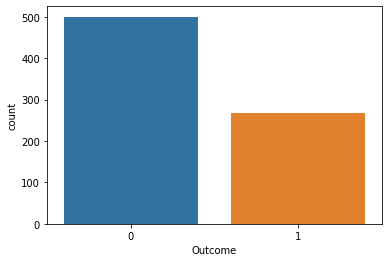

In [6]:
sns.countplot(x=diab_df['Outcome'])
diab_df['Outcome'].value_counts()

## Correlation between data fields

In [7]:
diab_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Heatmap of the correlation

<AxesSubplot:>

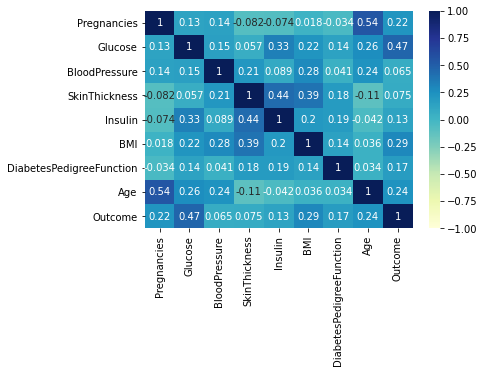

In [8]:
sns.heatmap(diab_df.corr(), annot=True, vmin=-1.0, vmax=1.0, cmap='YlGnBu')

BloodPressure and SkinThickness have very low correlation with the Outcome.

0    500
1    268
Name: Outcome, dtype: int64

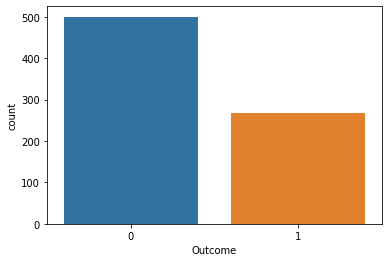

In [9]:
sns.countplot(x=diab_df['Outcome'])
diab_df['Outcome'].value_counts()

## Distribution plots

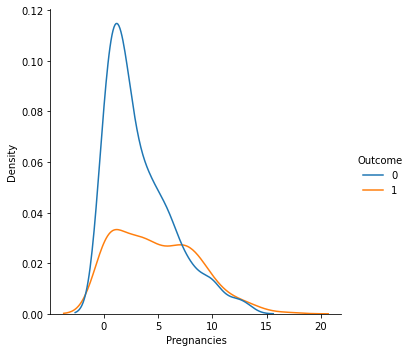

In [10]:
sns.displot(diab_df, x="Pregnancies", hue="Outcome", kind="kde")

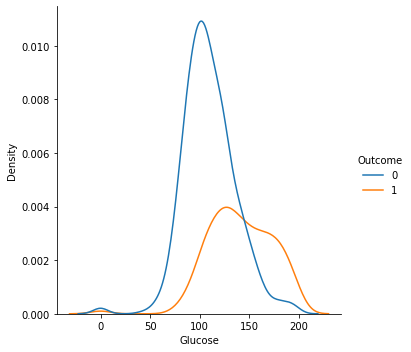

In [11]:
sns.displot(diab_df, x="Glucose", hue="Outcome", kind="kde")

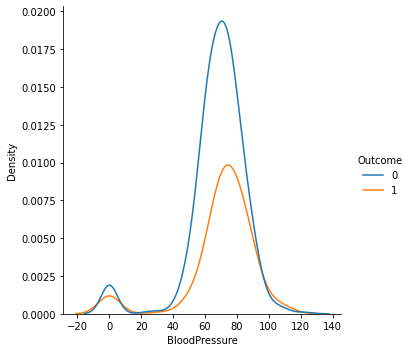

In [12]:
sns.displot(diab_df, x="BloodPressure", hue="Outcome", kind="kde")

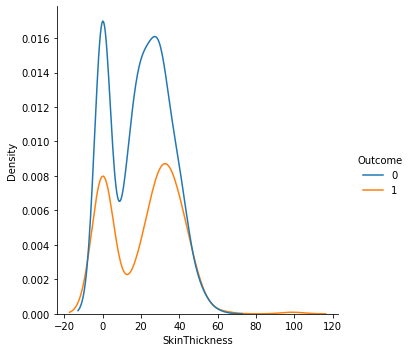

In [13]:
sns.displot(diab_df, x="SkinThickness", hue="Outcome", kind="kde")

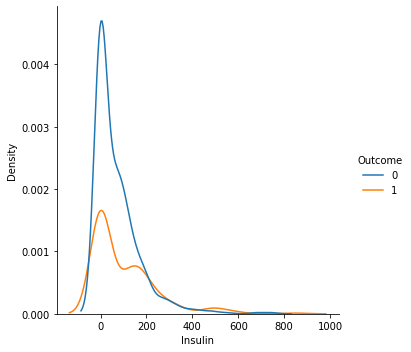

In [14]:
sns.displot(diab_df, x="Insulin", hue="Outcome", kind="kde")

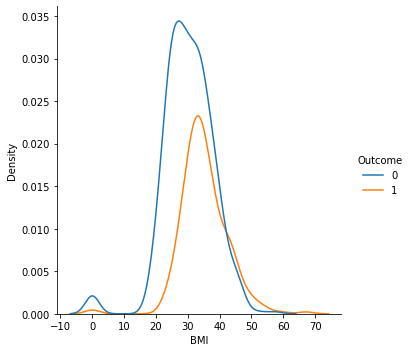

In [15]:
sns.displot(diab_df, x="BMI", hue="Outcome", kind="kde")

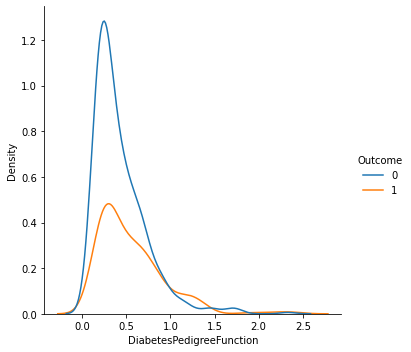

In [16]:
sns.displot(diab_df, x="DiabetesPedigreeFunction", hue="Outcome", kind="kde")

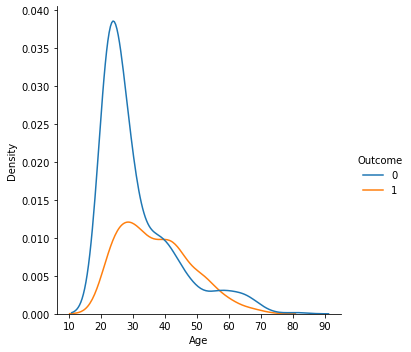

In [17]:
sns.displot(diab_df, x="Age", hue="Outcome", kind="kde")

## Making a ML model

In [18]:
x = diab_df.drop('Outcome', 1)
y = diab_df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=30)
clf = LogisticRegression(n_jobs=-1)
clf.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
print("Accuracy of the model = %.2f%%" %(acc*100))

Accuracy of the model = 81.82%


## Finding importance of different data fields

Text(0.5, 0, 'Importance')

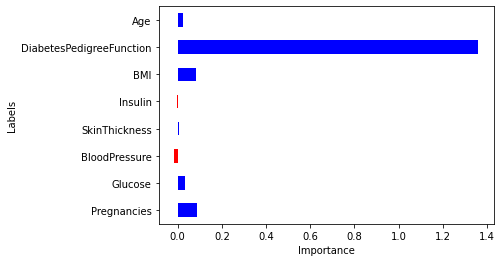

In [19]:
values = list(clf.coef_[0])
fields = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Result = pd.DataFrame()
Result['Labels'] = fields
Result['Importance'] = values
Result['Positive'] = Result['Importance'] > 0
Result.set_index('Labels', inplace=True)
Result.Importance.plot(kind='barh', color = Result.Positive.map({True:'blue', False:'red'}))
plt.xlabel('Importance')

Insulin, SkinThickness and BloodPressure have low importance in determining if the patient is diabetic or not.